# Simple Approach to Multi-Label Classification

## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = r"C:\Users\sm185567\Downloads\bug files\springfulldataset.csv"

In [4]:
data_raw = pd.read_csv(data_path,encoding = 'ISO-8859-15')
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(22321, 5)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 22321
Number of columns in data = 5




**Sample data:**

,Unnamed: 0,Priority,Created,Resolved,text
0,0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.so...
4,4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore


In [6]:
data_raw  = data_raw.rename(columns={"text": "Summary"})
data_raw = data_raw.drop(['Unnamed: 0'],axis=1)
data_raw

,Priority,Created,Resolved,Summary
0,Major,10/1/2007 1:30,10/28/2007 11:50,Endpoint Mapping and Saxon
1,Major,9/25/2007 17:42,10/20/2007 0:18,Thread safe problem during wsdl generation
2,Blocker,9/25/2007 4:42,10/19/2007 21:53,SaajUtils wrong way to detect SAAJ version
3,Trivial,9/20/2007 23:11,9/20/2007 23:25,Incorrect javadoc in org.springframework.ws.so...
4,Major,9/8/2007 17:05,9/9/2007 8:01,Loading default key store overwrites truststore
...,...,...,...,...
22316,Major,2/11/2009 6:12,2/16/2009 0:53,Multi-dimensional array brakes HTTP invokers r...
22317,Major,2/10/2009 22:00,2/12/2009 3:45,Possible NPE in JmsUtils.buildExceptionMessage...
22318,Major,2/4/2009 23:44,12/26/2018 17:28,throws clause ignored by pointcut parser
22319,Minor,2/4/2009 10:36,12/28/2018 11:38,Can bind to generic attribute but not generic ...


In [7]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22321 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   22321 non-null  object
 2   Resolved  22321 non-null  object
 3   Summary   22321 non-null  object
dtypes: object(4)
memory usage: 697.7+ KB


C:\Users\sm185567\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [8]:
data_raw = data_raw.dropna( how='all',
                    subset=['Resolved'])

In [9]:
data_raw = data_raw.dropna( how='all',
                    subset=['Summary'])

In [10]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 0 to 22320
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Priority  21990 non-null  object
 1   Created   22321 non-null  object
 2   Resolved  22321 non-null  object
 3   Summary   22321 non-null  object
dtypes: object(4)
memory usage: 871.9+ KB


C:\Users\sm185567\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [11]:
data_raw['Created'].dtype

dtype('O')

In [12]:
data_raw['time'] = (pd.to_datetime(data_raw['Resolved'])-  pd.to_datetime(data_raw['Created']))/np.timedelta64(1, 'D')

In [13]:
data_raw = data_raw.dropna(subset = ['time'])

In [14]:
data_raw.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22321 entries, 0 to 22320
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Priority  21990 non-null  object 
 1   Created   22321 non-null  object 
 2   Resolved  22321 non-null  object 
 3   Summary   22321 non-null  object 
 4   time      22321 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.0+ MB


C:\Users\sm185567\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [15]:
data_raw['time'].isnull().sum()

0

def toround(val):
    return(int(round(val)))

data_raw['time'] = data_raw['time'].apply(toround)

In [16]:
data_raw['time']

0          27.430556
1          24.275000
2          24.715972
3           0.009722
4           0.622222
            ...     
22316       4.778472
22317       1.239583
22318    3611.738889
22319    3614.043056
22320      42.045139
Name: time, Length: 22321, dtype: float64

In [17]:
def conv(hi):
    hi = hi/30
    return (round(hi))
    

data_raw['time'] = data_raw['time'].apply(conv)

In [18]:
data_raw.shape

(22321, 5)

In [19]:

data_raw['time'].describe()

count    22321.000000
mean         4.990144
std         14.410924
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        142.000000
Name: time, dtype: float64

In [20]:
data_raw.Priority.value_counts()

Minor       9736
Major       9623
Critical    1305
Trivial      714
Blocker      612
Name: Priority, dtype: int64

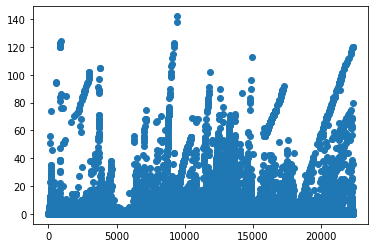

In [21]:

import matplotlib.pyplot as plt
plt.scatter(data_raw['time'].index, data_raw['time'])
plt.show()

In [22]:


data_raw['time']  = data_raw['time'].clip(lower=data_raw['time'].quantile(0.05), upper=data_raw['time'].quantile(0.95))

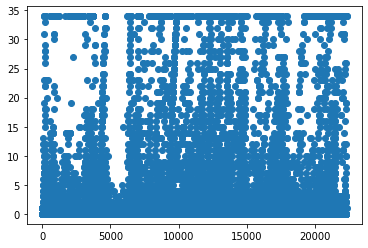

In [23]:

import matplotlib.pyplot as plt
plt.scatter(data_raw['time'].index, data_raw['time'])
plt.show()

In [24]:


data_raw['time'].describe()

count    22321.000000
mean         3.676672
std          8.607926
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         34.000000
Name: time, dtype: float64

In [25]:
data_raw['time'].value_counts()

0     13782
1      2724
34     1123
2      1080
3       579
4       394
5       302
6       238
7       208
8       188
9       153
10      138
11      129
12      109
16      104
13      101
14       85
18       85
17       83
15       69
20       62
21       60
19       56
23       55
22       53
26       43
24       42
28       42
27       40
30       39
25       39
33       33
32       29
31       29
29       25
Name: time, dtype: int64

In [26]:
def convsmall(hi):
    hi = str(hi)
    for i in range(len(hi)-1,0,-1):
         hi = hi.replace(hi[i],'0')
    return(int(hi))

In [27]:
data_raw['time'] = data_raw['time'].apply(convsmall)

In [28]:
data_raw['time'].value_counts()

0     13997
1      2724
30     1220
2      1080
10      830
3       579
20      408
4       394
5       302
6       238
7       208
8       188
9       153
Name: time, dtype: int64

In [29]:
data_raw["Priority"] = data_raw["Priority"].fillna('Critical')

In [30]:
data_raw["Priority"].replace({"Trivial": "Minor", "Blocker": "Critical"}, inplace=True)

In [31]:
data_raw.Priority.value_counts()

Minor       10450
Major        9623
Critical     2248
Name: Priority, dtype: int64

In [32]:
data_raw=data_raw[['Summary','Priority','time']]

### 1.1. Checking for missing values

In [33]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

Summary     0
Priority    0
time        0
dtype: int64


In [34]:
list(data_raw.columns.values)

['Summary', 'Priority', 'time']

### 1.2. Calculating number of comments under each label

In [35]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  22321
Number of clean comments =  13997
Number of comments with labels = 8324


In [36]:
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)

['Priority', 'time']


In [37]:
categories

['Priority', 'time']

In [38]:
data_raw['Priority'] = data_raw['Priority'].astype(str)

In [39]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,Priority,MajorMajorCriticalMinorMajorMajorMinorMajorMaj...
1,time,68532


In [40]:
categories

['Priority', 'time']

In [41]:
data_raw.iloc[:,2:].sum().values

array([68532], dtype=int64)

In [42]:
data_raw

,Summary,Priority,time
0,Endpoint Mapping and Saxon,Major,1
1,Thread safe problem during wsdl generation,Major,1
2,SaajUtils wrong way to detect SAAJ version,Critical,1
3,Incorrect javadoc in org.springframework.ws.so...,Minor,0
4,Loading default key store overwrites truststore,Major,0
...,...,...,...
22316,Multi-dimensional array brakes HTTP invokers r...,Major,0
22317,Possible NPE in JmsUtils.buildExceptionMessage...,Major,0
22318,throws clause ignored by pointcut parser,Major,30
22319,Can bind to generic attribute but not generic ...,Minor,30


### 1.3. Calculating number of comments having multiple labels

C:\Users\sm185567\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


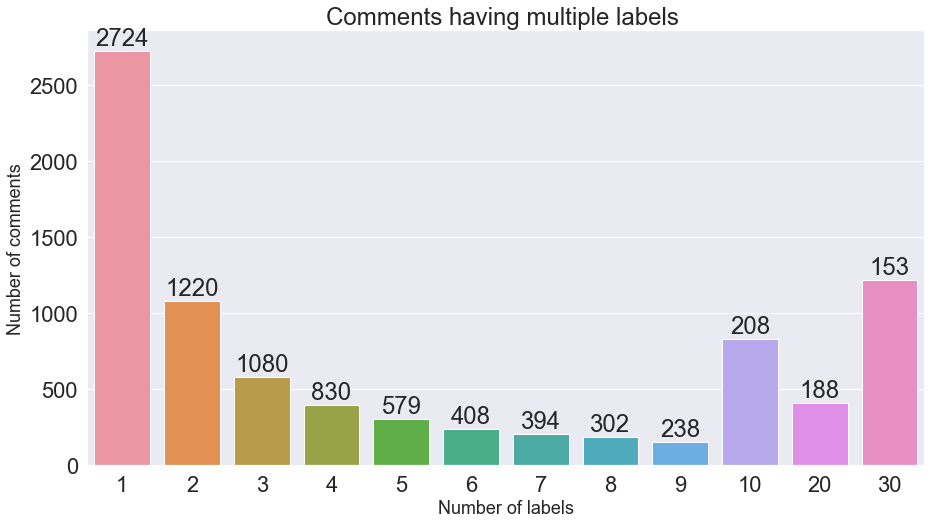

In [43]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments

In [44]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.Priority==1]
text = subset.Summary.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Priority",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.Severity==1]
text = subset.Summary.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severity",fontsize=40)
plt.imshow(cloud_severe_toxic)




plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 2880x1800 with 0 Axes>

## 2. Data Pre-Processing

In [45]:
data = data_raw
#data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
#data.shape

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [47]:
data['Summary'].head()

0                           Endpoint Mapping and Saxon
1           Thread safe problem during wsdl generation
2           SaajUtils wrong way to detect SAAJ version
3    Incorrect javadoc in org.springframework.ws.so...
4      Loading default key store overwrites truststore
Name: Summary, dtype: object

In [48]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [49]:
data['Summary'] = data['Summary'].str.lower()
data['Summary'] = data['Summary'].apply(cleanHtml)
data['Summary'] = data['Summary'].apply(cleanPunc)
#data['Summary'] = data['Summary'].apply(keepAlpha)
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
data['Summary'].head(20)

0     endpoint mapping and saxon                                                                                                      
1     thread safe problem during wsdl generation                                                                                      
2     saajutils wrong way to detect saaj version                                                                                      
3     incorrect javadoc in org springframework ws soap soapfault                                                                      
4     loading default key store overwrites truststore                                                                                 
5     xpathexpression is not thread-safe                                                                                              
6     ws-security exception not being handled                                                                                         
7     order of setting properties in webservicegateways

### 2.2. Removing Stop Words

In [50]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Summary'] = data['Summary'].apply(removeStopWords)
data.head()

,Summary,Priority,time
0,endpoint mapping saxon,Major,1
1,thread safe problem wsdl generation,Major,1
2,saajutils wrong way detect saaj version,Critical,1
3,incorrect javadoc org springframework ws soap soapfault,Minor,0
4,loading default key store overwrites truststore,Major,0


### 2.3. Stemming

In [51]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['Summary'] = data['Summary'].apply(stemming)
data.head()

,Summary,Priority,time
0,endpoint map saxon,Major,1
1,thread safe problem wsdl generat,Major,1
2,saajutil wrong way detect saaj version,Critical,1
3,incorrect javadoc org springframework ws soap soapfault,Minor,0
4,load default key store overwrit truststor,Major,0


In [52]:
data["Priority"].replace({"Critical": 1, "Major": 2,"Minor":3}, inplace=True)
data["Priority"]

0        2
1        2
2        1
3        3
4        2
        ..
22316    2
22317    2
22318    2
22319    3
22320    2
Name: Priority, Length: 22321, dtype: int64

### 2.4. Train-Test Split

In [53]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(15624, 3)
(6697, 3)


In [54]:
train_text = train['Summary']
test_text = test['Summary']

### 2.5. TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [56]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Summary'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Summary'], axis=1)

## 3. Multi-Label Classification

### 3.1. Multiple Binary Classifications - (One Vs Rest Classifier)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [58]:
train['Priority'] = train['Priority'].astype(str)
y_test['Priority'] = y_test['Priority'].astype(str)

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target
variablex_ros, y_ros = ros.fit_resample(x_train, train['Priority'])

print('Original dataset shape', Counter(train['Priority']))
print('Resample dataset shape', Counter(y_ros))

variablex_ros

In [59]:
y_train

,Priority,time
17442,2,0
23221,3,0
18497,3,0
21166,3,1
6692,2,0
...,...,...
12728,2,2
23289,3,0
5732,1,0
1041,2,2


In [60]:
y_train['Priority']

17442    2
23221    3
18497    3
21166    3
6692     2
        ..
12728    2
23289    3
5732     1
1041     2
17047    3
Name: Priority, Length: 15625, dtype: int64

In [61]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train['Priority']) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  


After OverSampling, the shape of train_X: (21882, 64579)
After OverSampling, the shape of train_y: (21882,) 



from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target
variablex_ros, y_ros = ros.fit_resample(x_train, train['time'])

print('Original dataset shape', Counter(train['time']))
print('Resample dataset shape', Counter(y_ros))

In [62]:
variablex_ros

NameError: name 'variablex_ros' is not defined

In [63]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, y_train)
    print("hi")
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print(prediction)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print(metrics.confusion_matrix(y_test[category], prediction))
    from sklearn.metrics import classification_report
    print(classification_report(y_test[category], prediction, target_names=['Critical','Major','Minor']))
    print("\n")

**Processing Priority comments...**

ValueError: Multioutput target data is not supported with label binarization

In [64]:
prediction

NameError: name 'prediction' is not defined

### 3.2. Multiple Binary Classifications - (Binary Relevance)

In [65]:
y_train

,Priority,time
17442,2,0
23221,3,0
18497,3,0
21166,3,1
6692,2,0
...,...,...
12728,2,2
23289,3,0
5732,1,0
1041,2,2


In [68]:
train['Priority'] = train['Priority'].astype(int)
y_test['Priority'] = y_test['Priority'].astype(int)

In [69]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

TypeError: len() of unsized object

### 3.3. Classifier Chains

In [67]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [68]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

MemoryError: Unable to allocate 81.6 GiB for an array with shape (14981, 731059) and data type float64

### 3.4. Label Powerset

In [69]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [216]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

TypeError: no supported conversion for types: (dtype('O'),)

### 3.5. Adapted Algorithm

In [273]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [277]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

MemoryError: Unable to allocate 81.6 GiB for an array with shape (14981, 731059) and data type float64